In [ ]:
import ezdxf
from ezdxf import colors
from ezdxf.enums import TextEntityAlignment

# Create a new DXF document.
doc = ezdxf.new(dxfversion="R2010")

# Create new table entries (layers, linetypes, text styles, ...).
doc.layers.add("TEXTLAYER", color=colors.RED)

# DXF entities (LINE, TEXT, ...) reside in a layout (modelspace, 
# paperspace layout or block definition).  
msp = doc.modelspace()

# Add entities to a layout by factory methods: layout.add_...() 
msp.add_line((0, 0), (10, 0), dxfattribs={"color": colors.YELLOW})
msp.add_text(
    "Test", 
    dxfattribs={
        "layer": "TEXTLAYER"
    }).set_placement((0, 0.2), align=TextEntityAlignment.CENTER)

# Save the DXF document.
doc.saveas("test.dxf")

In [ ]:
import ezdxf
 
# 创建新文档（指定R2010版本）
doc = ezdxf.new('R2010')  # 支持版本：'R12', 'R2000', 'R2004', 'R2007', 'R2010', 'R2013', 'R2018'
 
# 获取模型空间
msp = doc.modelspace()
 
# 添加半径为10的圆（圆心坐标(0, 0)）
msp.add_circle(center=(0, 0), radius=10)
 
# 添加矩形（通过闭合多段线实现）
msp.add_polyline2d(points=[(0, 0), (10, 0), (10, 10), (0, 10), (0, 0)])
 
# 保存文件
doc.saveas('circle.dxf')

In [ ]:
import ezdxf
from ezdxf.addons.drawing import matplotlib

doc = ezdxf.readfile("test.dxf")
fig = matplotlib.qsave(doc.modelspace(), "output.png")  # 导出为图片

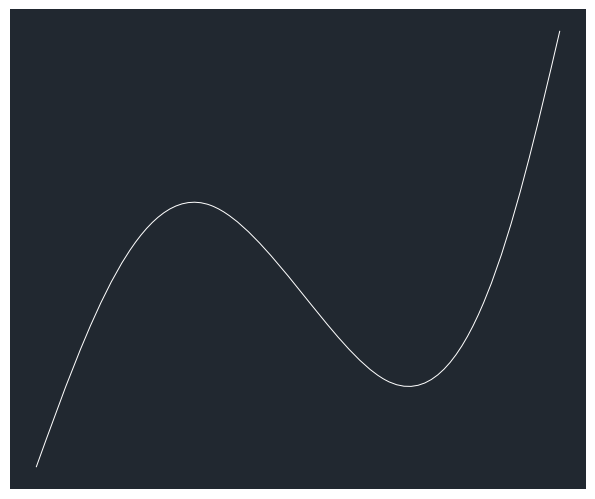

In [1]:
import ezdxf
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

# 读取 DXF 文件
doc = ezdxf.readfile("spline.dxf")
msp = doc.modelspace()

# 创建渲染上下文和后端
ctx = RenderContext(doc)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
backend = MatplotlibBackend(ax)

# 前端渲染
Frontend(ctx, backend).draw_layout(msp, finalize=True)

plt.show()

In [ ]:
import ezdxf
from ezdxf.addons.drawing import matplotlib as mpl_addon

# 读取 DXF 文件
doc = ezdxf.readfile("circle.dxf")
msp = doc.modelspace()

# 直接保存为图片文件
mpl_addon.qsave(msp, "output.png")

In [ ]:
import ezdxf
from ezdxf.addons.drawing import matplotlib as mpl_addon
import matplotlib.pyplot as plt

# 验证两者是否相同
print("mpl_addon.plt 和 plt 是否相同:", mpl_addon.plt is plt)

# 读取 DXF 文件
doc = ezdxf.readfile("test.dxf")
msp = doc.modelspace()

# 使用qsave保存
mpl_addon.qsave(msp, "output.png")

# 使用mpl_addon.plt显示保存的图片
img = mpl_addon.plt.imread("output.png")
mpl_addon.plt.figure(figsize=(10, 10))
mpl_addon.plt.imshow(img)
mpl_addon.plt.axis('off')
mpl_addon.plt.show()

In [ ]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

your_mesh = mesh.Mesh.from_file('example.stl')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))
plt.show()